In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pylab import cm, contour, clabel, colorbar

In [3]:
C = 1
D = 100

In [4]:
def reward(qos, power, C=1, D=10):
    return qos - C * np.log((power + 1) * D)

In [5]:
def plot(C, D):
    qos = np.linspace(0, 1, 1000)
    tput = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(qos, tput)
    Z = reward(X, Y, C=C, D=D)
    
    df = pd.DataFrame(Z.flatten())
    d = df.describe()
    
    scale = d[0]['max'] - d[0]['min']
    Z = (Z - d[0]['min']) / scale
    
    print("Reward function: (qos - {} * log((power + 1) * {}) {} {}) / {}".format(C, D, '-' if d[0]['min']>=0 else '+', abs(d[0]['min']), scale))
    
    print("C = {:4d}  D={:4d}".format(C, D))
    # labels = np.linspace(0, 1, 1000)
    im = plt.imshow(Z, cmap=cm.RdBu)
    # plt.xticks(labels)
    # plt.yticks(labels)
    ax = plt.gca()
    ax.set_xlabel('qos')
    ax.set_ylabel('power')


    # adding the Contour lines with labels
    cset = contour(Z, np.linspace(0, 1, 10), linewidths=2, cmap=cm.Set2)
    clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

    colorbar(im) # adding the colobar on the right
    
    return X, Y, Z

Notice that the graph defined above has an error: it shows the wrong values in the axis

Reward function: (qos - 1 * log((power + 1) * 10) + 2.995732273553991) / 1.693147180559945
C =    1  D=  10


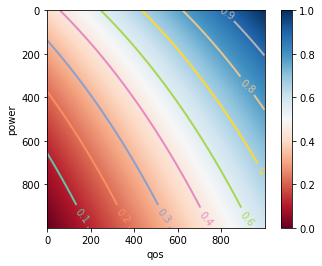

In [6]:
X, Y, Z = plot(C=1, D=10)

Reward function: (qos - 1 * log((power + 1) * 100) + 5.298317366548036) / 1.6931471805599445
C =    1  D= 100


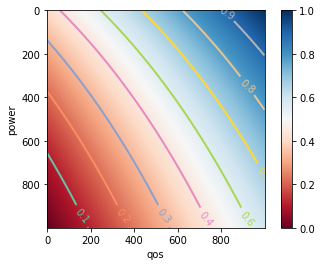

In [13]:
_, _, _ = plot(C=1, D=100)

Reward function: (qos - 1 * log((power + 1) * 1000) + 7.600902459542082) / 1.6931471805599454
C =    1  D=1000


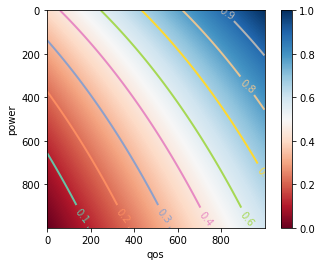

In [14]:
_, _, _ = plot(C=1, D=1000)

# 3D

Text(0.5, 0, 'reward')

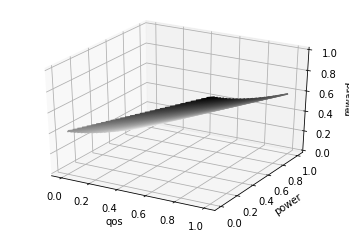

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('qos')
ax.set_ylabel('power')
ax.set_zlabel('reward')

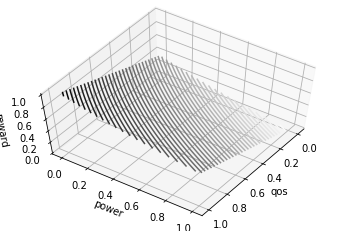

In [10]:
ax.view_init(60, 35)
fig

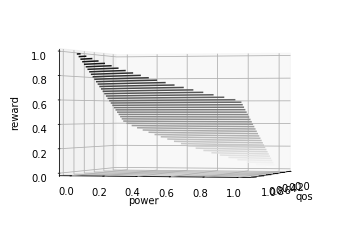

In [11]:
ax.view_init(0, 15)
fig

In [12]:
pd.DataFrame(Z.flatten()).describe()

,0
count,1000000.000000
mean,0.476564
std,0.206865
min,0.000000
25%,0.321967
50%,0.476561
75%,0.626479
max,1.000000
